## Selecting the best Machine Learning algorithm


- Data Source available at:

 http://archive.ics.uci.edu/ml/datasets/Bank+Marketing# 


This data is related with a bank marketing campaign (phone calls).

The bank's business goal is to attract new clients to open a Certificate of Deposit i.e., to predict if a prospect will open a CD.


- We've cleaned the data and performed EDA.

- Loading the data:

In [66]:
#imports

import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")


import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('C:/Users/uknow/Desktop/bank_final2.csv')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome,['y']_yes
0,1,3,1,0,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
1,1,7,1,3,1,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
2,1,7,1,3,0,2,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
3,1,0,1,1,0,0,0,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0
4,1,7,1,3,0,0,2,1,6,1,...,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1,0


In [5]:
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
['y']_yes           int64
dtype: object

In [6]:
df.rename(columns = {"['y']_yes":'y'}, inplace = True) 

In [7]:
X= pd.read_csv('C:/Users/uknow/Desktop/bank_final.csv')


## train_test_split: 80/20

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df.y, test_size=0.2, random_state=2019)

In [62]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32950, 20) (32950,)
(8238, 20) (8238,)


## k fold cross-validation

In [63]:
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## Standardize the features 


- Many machine learning and optimization algorithms also require feature scaling
for optimal performance

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Perceptron model

Having standardized the training data, we can now train a perceptron model

In [64]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

### Predict
Having trained a model in scikit-learn, we can make predictions

In [65]:
#ppnprep=y_pred are the class labels that we predicted
ppnpred = ppn.predict(X_test)


### R2 score:

In [35]:
print(ppn.score(X_train, y_train), ppn.score(X_test, y_test))

0.8949317147192716 0.8911143481427531


#### Overfitting is a common problem in machine learning

the model performs well on training data but does not generalize well to test data

### Peformance metrics available in Scikit-learn via the metrics module:

#### Accuracy_score:

the proportion of correct classifications

TP+TN / TP+TN+FP+FN

In [67]:
# Calculate the classification accuracy of the perceptron

# Here y_test are the true class labels 

from sklearn import metrics

from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, ppnpred))

Accuracy: 0.90


#### Confusion_matrix: 

or error matrix allows a more detailed analysis than the accuracy_score which can yield to misleading results if the data set is unbalanced 

(when the numbers of observations in different classes vary greatly)

In [68]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, ppnpred))

[[7167  100]
 [ 759  212]]


####   Cross-validation:


EstimatorCV has built-in cross-validation capabilities to automatically select the best hyper-parameters.

"The advantage of using a cross-validation estimator over the canonical Estimator class along with grid search is that they can take advantage of warm-starting by reusing precomputed results in the previous steps of the cross-validation process. This generally leads to speed improvements." (scikit-learn.org)

In [150]:
from sklearn.model_selection import cross_val_score

PPNCV = (cross_val_score(ppn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
PPNCV

0.7364188163884674

#### Recall_score:

or recognition rate is another performance metric used in predictive analytics

Recall (or sensitivity) is the fraction of positives predicted correctly:

TP/(TP + FN) 




In [70]:
from sklearn.metrics import recall_score

print(round(metrics.recall_score(y_test, ppnpred),2))


0.22


#### Precision_score:

or positive predictive value (PPV) is another performance metric used in predictive analytics

TP / (TP + FP) 

- For all positive how much the model predicts correctly

In [76]:
from sklearn.metrics import precision_score

print(round(metrics.precision_score(y_test, ppnpred),2))

0.68




#### f1-score:

- F1-score is the harmonic mean of precision and sensitivity 

F1 = 2*PPV * TPR /(PPV+TPR)

#### Summary using classification_report

In [57]:
from sklearn.metrics import classification_report

print(' Performance Metrics Reports\n',classification_report(y_test, ppnpred))

 Performance Metrics Reports
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7267
           1       0.57      0.32      0.41       971

   micro avg       0.89      0.89      0.89      8238
   macro avg       0.74      0.64      0.67      8238
weighted avg       0.87      0.89      0.88      8238



#### ROC curve plot and Area Under the Curve (AUC)


 - a model that randomly guesses the label will result in the red interrupted line 
 
 - our model has the ROC curve is above the red line (good
 
 - Many data scientists prefer to use the AUC to analyze a model’s performance:
 
Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.**


.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)


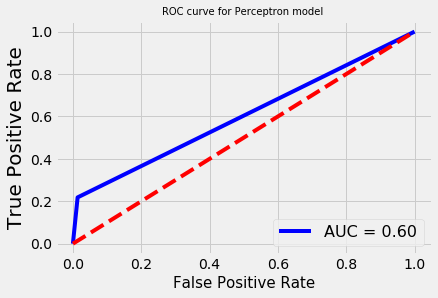

In [69]:
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, ppnpred)

roc_aucgbk = metrics.auc(fprgbk, tprgbk)

plt.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Perceptron model ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

plt.show()


###  AUC = 60% 


The reason for the perceptron algorithm perfomance is that it doesn't converge if the classes are not perfectly linearly separable.



- Next we will look at other classifiers:
 

##  Logistic Regression 

 - one of the most widely used algorithms for classification

- it is similar to linear regression where we use the sigmoid function instead of linear function to fit the data

The output of the sigmoid function is interpreted as the probability of particular sample belonging to class y=1 given its features X_train parameterized by the weights (the coefficients are obtained by maximizing the log-likelihood function)


####  p the probability of a positive event (y=1)
p =prob(y=1 |X)

#### Odds ratio: 
p/(1-p) = odds in favor of the positive event

#### z is the net input 
=the linear combination of weights and sample features X

 z = log(p/1-p) 

#### y = response variable

y = sigmoid (z)


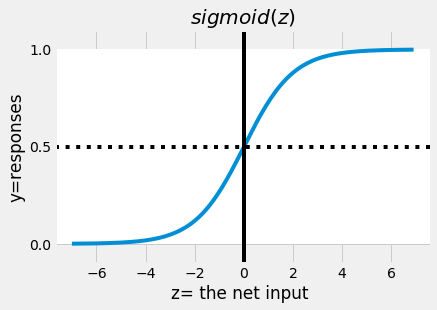

In [94]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
plt.plot(z, sigmoid(z))
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z= the net input ')
plt.title('$sigmoid (z)$')
plt.ylabel("y=responses")
plt.show()

#### The output of the sigmoid(z) is interpreted as prob(y=1 | X, w)

the probability of particular sample belonging to class y= 1 given its features X parameterized by the weights w:

## Modeling class probabilities using Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [79]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [80]:
# logistic regression is a linear model, so you have coefficients and intercepts:
logreg.coef_

array([[ 2.88973611e-03,  4.11841186e-03,  3.45071510e-02,
         7.77553359e-02, -7.48919308e-02,  1.14654931e-03,
        -6.40565825e-05, -1.10431285e-01, -9.14994280e-02,
         5.53874577e-02,  1.18672995e+00, -2.05549304e-01,
         3.06131380e-01,  4.25996254e-02, -1.83038198e-01,
        -5.94819697e-03, -5.73554823e-03, -1.80977601e-03,
        -5.79414554e-02, -4.36977126e-02]])

In [81]:
logreg.intercept_

array([0.00288974])

In [95]:
coeffs = pd.DataFrame({
    'features X': X_train.columns,
    'weights w'  : logreg.coef_[0]
})

coeffs

,features X,weights w
0,age,0.002890
1,job,0.004118
2,marital,0.034507
3,education,0.077755
4,default,-0.074892
5,housing,0.001147
6,loan,-0.000064
7,contact,-0.110431
8,month,-0.091499
9,day_of_week,0.055387


#### The output that recreates the predictions

In [90]:

Y = X_train.dot(logreg.coef_.T) + logreg.intercept_
# and this gives us our predictions
sigmoid(Y)

,0
29423,0.049215
13800,0.025525
36291,0.201122
107,0.010089
2282,0.004613
13393,0.029634
17420,0.002724
2021,0.007320
14955,0.261947
2776,0.003419


### Predict

In [103]:
# you can then use the predict method to predic out of sample data
logpred= logreg.predict(X_test)
logpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
print(logreg.score(X_train, y_train), logreg.score(X_test, y_test))

0.9091350531107739 0.9067734887108522


### Predict also the class-membership probability of the samples

via the predict_proba method.

In [100]:
logreg.predict_proba(X_test)

array([[0.97539505, 0.02460495],
       [0.96592654, 0.03407346],
       [0.72884617, 0.27115383],
       ...,
       [0.98441548, 0.01558452],
       [0.67653654, 0.32346346],
       [0.9960643 , 0.0039357 ]])

### Peformance metrics in scikit-learn :

In [106]:
print(confusion_matrix(y_test, logpred))

print(round(accuracy_score(y_test, logpred),2)*100)

print(round(metrics.recall_score(y_test, logpred),2))

print(round(metrics.precision_score(y_test, logpred),2))

LOGCV = (cross_val_score(logreg, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())



[[7104  163]
 [ 605  366]]
91.0
0.38
0.69


In [107]:
print(' Performance Metrics Reports\n',classification_report(y_test, logpred))

 Performance Metrics Reports
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7267
           1       0.69      0.38      0.49       971

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.81      0.68      0.72      8238
weighted avg       0.89      0.91      0.89      8238



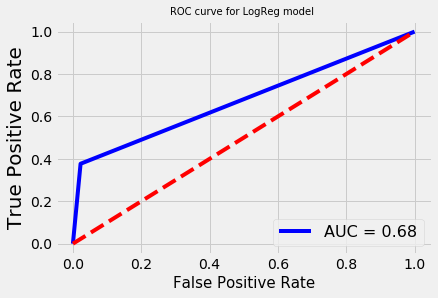

In [109]:
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, logpred)

roc_aucgbk = metrics.auc(fprgbk, tprgbk)

plt.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for LogReg model ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

plt.show()


###  AUC = 68% 

is a slight improvement.

- We can do a Grid Search

In [110]:
from sklearn.model_selection import GridSearchCV

# set up the parameters of the model you'd like to fit
param_grid = {
    'penalty': ['l1', 'l2'],
    'C'      : [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
}

In [ ]:
# load it into the grid
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10)

# fit it on your training data
grid.fit(X_train, y_train)

# get the version that gave you the best fit
grid.best_params_

# Note that tunning parameter is 1/C is small

In [111]:
params_lg = {'C': 10000, 'penalty': 'l1'}

logreg.set_params(**params_lg)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [112]:
logreg.fit(X_train, y_train)

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [113]:
logreg.predict_proba(X_test)

array([[0.98140745, 0.01859255],
       [0.97244549, 0.02755451],
       [0.72750355, 0.27249645],
       ...,
       [0.99221605, 0.00778395],
       [0.68946643, 0.31053357],
       [0.99653377, 0.00346623]])

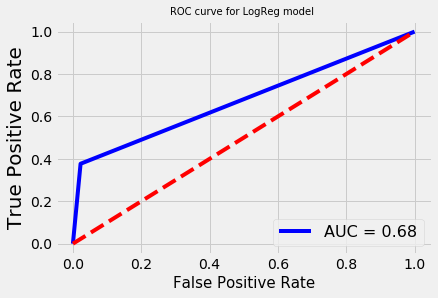

In [114]:
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, logpred)

roc_aucgbk = metrics.auc(fprgbk, tprgbk)

plt.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for LogReg model ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

plt.show()

### Interpretation

First code performs a logistic regression using default options.

Then I performed a grid search on logistic regression and selected the best_params for logistic regression with Lasso using ('penalty=l1') and tunning parameter 1/C ('C': 10000) on the same variable. I fitted on the entire training data.

As I expect, the results are similar, giving me confidence that the logistic regression model is stable.

## Decision Tree Model

This identification can be quite useful when we try to understand what is driving market behavior. 

It also has an advantage over regression in its ability to detect nonlinear relationships.

In [115]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

### Performance Metrics

In [116]:

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6810  457]
 [ 468  503]]
89.0


In [117]:
print(' Performance Metrics Reports\n',classification_report(y_test, logpred))

 Performance Metrics Reports
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7267
           1       0.69      0.38      0.49       971

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.81      0.68      0.72      8238
weighted avg       0.89      0.91      0.89      8238



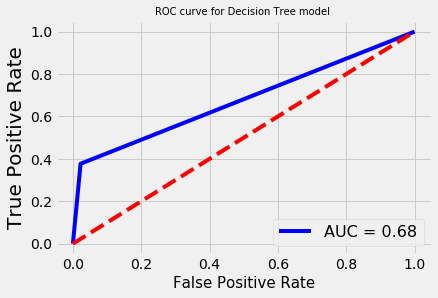

In [119]:
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, logpred)

roc_aucgbk = metrics.auc(fprgbk, tprgbk)

plt.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Decision Tree model ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

plt.show()

## Random Forest Model

Classify the data set by taking a majority vote of each leaf value

In [129]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)


### Performance Metrics

In [130]:
print(confusion_matrix(y_test, rfpred ))
print(round(accuracy_score(y_test, rfpred),2)*100)
RFCV = (cross_val_score(rf, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6979  288]
 [ 467  504]]
91.0


In [131]:
print(' Performance Metrics Reports\n',classification_report(y_test, rfpred))

 Performance Metrics Reports
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      7267
           1       0.64      0.52      0.57       971

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.79      0.74      0.76      8238
weighted avg       0.90      0.91      0.90      8238



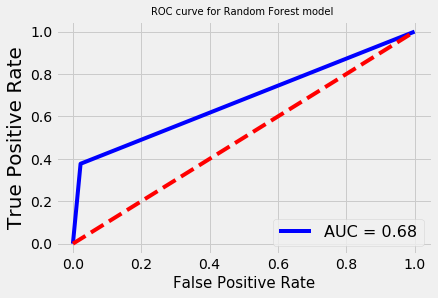

In [132]:
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, logpred)

roc_aucgbk = metrics.auc(fprgbk, tprgbk)

plt.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Random Forest model ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

plt.show()

## Gradient Boosting

In [135]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gbpred = gb.predict(X_test)


### Performance Metrics

In [136]:
print(confusion_matrix(y_test, gbpred ))
print(round(accuracy_score(y_test, gbpred),2)*100)
GBCV = (cross_val_score(gb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[6996  271]
 [ 456  515]]
91.0


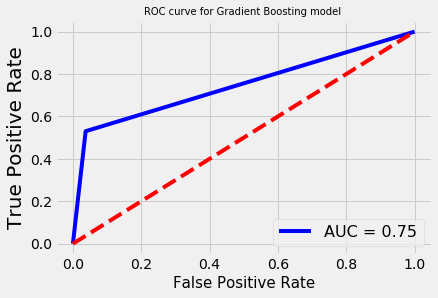

In [137]:
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, gbpred)

roc_aucgbk = metrics.auc(fprgbk, tprgbk)

plt.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Gradient Boosting model ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

plt.show()


###  AUC = 75% 

is a slight improvement.

## Support Vector Machine

In [140]:
from sklearn.svm import SVC
sv= SVC(kernel = 'sigmoid')
sv.fit(X_train, y_train)
svpred = sv.predict(X_test)


### Performance Metrics

In [153]:
print(confusion_matrix(y_test, svpred))
print(round(accuracy_score(y_test, svpred),2)*100)
SVCV = (cross_val_score(sv, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7267    0]
 [ 971    0]]
88.0


In [143]:
print(' Performance Metrics Reports\n',classification_report(y_test, svpred))

 Performance Metrics Reports
               precision    recall  f1-score   support

           0       0.88      1.00      0.94      7267
           1       0.00      0.00      0.00       971

   micro avg       0.88      0.88      0.88      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.78      0.88      0.83      8238



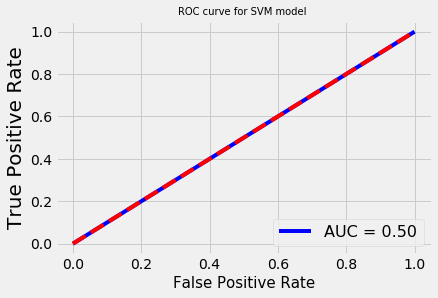

In [144]:
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, svpred)

roc_aucgbk = metrics.auc(fprgbk, tprgbk)

plt.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for SVM model ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

plt.show()

## K-Nearest Neighbors Model

In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

In [146]:
print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7162  105]
 [ 690  281]]
90.0


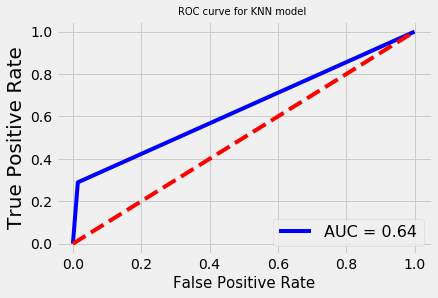

In [147]:
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, knnpred)

roc_aucgbk = metrics.auc(fprgbk, tprgbk)

plt.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for KNN model ',fontsize=10)
plt.ylabel('True Positive Rate',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 16})

plt.show()

## Model Selection

In [154]:
models = pd.DataFrame({
                'Models': ['Perceptron', 'Logistic Model', 'Decision Tree', 'Random Forest','Support Vector Machine', 'Gradient Boosting', 'K-Near Neighbors'],
                'Score':  [PPNCV, LOGCV, DTREECV, RFCV, SVCV, GBCV, KNNCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
5,Gradient Boosting,0.914476
1,Logistic Model,0.909439
3,Random Forest,0.907587
6,K-Near Neighbors,0.902914
4,Support Vector Machine,0.888649
2,Decision Tree,0.882307
0,Perceptron,0.736419


## Applications

This code can help solve the following Business Problems:

"How to acquire new clients?"

"How to improve the efficiency of a marketing campaign?"

